# **<center><font style="color:rgb(100,109,254)">Module 7: Physics + Computer Vision</font> </center>**

<center>
    <img src='https://drive.google.com/uc?export=download&id=1fZcQOIeX7OVJhsmMH5COSOzbBAxA28UG' width=800> 
</center>
    

## **<font style="color:rgb(134,19,348)"> Module Outline </font>**

The module can be split into the following parts:

- ***Lesson 1:* Introduction to Pymunk** *(This Tutorial)*

- *Lesson 2: Integrating Pymunk with OpenCV*

- *Lesson 3: Build the Final Application*


**Please Note**, these Jupyter Notebooks are not for sharing; do read the Copyright message below the Code License Agreement section which is in the last cell of this notebook.
-Taha Anwar

Alright, let's get started.


<center> <img src='https://raw.githubusercontent.com/viblo/pymunk/master/docs/src/_static/pymunk_logo_animation.gif'></center> 

[Pymunk](http://www.pymunk.org/en/latest/) is an easy-to-use pythonic 2d physics library that can be used whenever you need 2d rigid body physics from Python. Perfect when you need 2d physics in your game, demo, or other application! It is built on top of the very capable 2d physics library [Chipmunk](http://chipmunk-physics.net/).

The first version was released in 2007 and Pymunk is still actively developed and maintained today, more than 10 years of active development!

Pymunk has been used with success in many projects, big and small. For example, 3 Pyweek game competition winners, more than a dozen published scientific papers, and even in a self-driving car simulation! See the [Showcases section](http://www.pymunk.org/en/latest/showcase.html) on the **[Pymunk webpage](http://www.pymunk.org/en/latest/))** for some examples.

## **<font style="color:rgb(134,19,348)">The Pymunk's Vision</font>**

<center> “Make 2d physics easy to include in your game” </center>

It is (or is striving to be):

- **Easy to use** - It should be easy to use, no complicated code should be needed to add physics to your game or program.

- **“Pythonic”** - It should not be visible that a c-library (Chipmunk) is at the bottom, it should feel like a Python library (no strange naming, OO, no memory handling, and more)

- **Simple to build & install** - You shouldn’t need to have a zillion libraries installed to make it install, or do a lot of command-line tricks.

- **Multi-platform** - Should work on both Windows, *nix, and OSX.

- **Non-intrusive** - It should not put restrictions on how you structure your program and not force you to use a special game loop, it should be possible to use with other libraries like Pygame, Pyglet, and OpenCV.

## **<font style="color:rgb(134,19,348)">Installation</font>**

To install it using pip, we just have to run the following command.

In [1]:
!pip install pymunk

     -------------------------------------- 286.3/286.3 kB 1.4 MB/s eta 0:00:00


### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

After installation, we will import the required libraries.

In [2]:
import cv2
import pymunk
import numpy as np
import pymunk.matplotlib_util
import matplotlib.pyplot as plt

## **<font style="color:rgb(134,19,348)">Pymunk's Basics</font>**

To get started with Pymunk, you must know about the following three classes:

1. **Rigid Bodies** ([**`pymunk.Body`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Body)); A rigid body holds the physical properties of an object (mass, position, rotation, velocity, etc.). It does not have a shape by itself.

2. **Collision Shapes** ([**`pymunk.Circle`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Circle), [**`pymunk.Segment`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Segment) and [**`pymunk.Poly`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Poly)); By attaching shapes to bodies, you can define a body’s shape. You can attach many shapes to a single body to define a complex shape, or none if it doesn’t require a shape.

3. **Spaces** ([**`pymunk.Space`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Space)); Spaces are the basic simulation unit in Pymunk. You add bodies, and shapes to a space (using [**`pymunk.space.add()`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Space.add)), and then update the space as a whole (using [**`pymunk.space.step()`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Space.step)). They control how all the rigid bodies, shapes, and constraints interact together.

In [17]:
# Create a Space which will contain the simulation.
space = pymunk.Space()

# Create a Body.
body = pymunk.Body()

# Set the position of the body.
body.position = 300,300     

# Create a shape and attach it to the body.
# Uncomments these lines one by one to see how each shape looks like.
shape = pymunk.Circle(body, radius=100)    
#shape = pymunk.Segment(body, a=(0, 0), b=(200, 200), radius=10)    
#shape = pymunk.Poly(body, vertices=[(0,0), (200,0), (200,200)])    
#shape = pymunk.Poly.create_box(body, size=(100,100))

# Set the gravity.
space.gravity = 0, -500 

# Add both the body and the shape to the simulation.
space.add(body, shape)  

# Display the success message.
print('The body is added to the space successfully.')

The body is added to the space successfully.


Now that we have created a body with a shape and have added it to the space, let's utilize the [**`pymunk.matplotlib_util.DrawOptions()`**](http://www.pymunk.org/en/latest/pymunk.matplotlib_util.html#pymunk.matplotlib_util.DrawOptions) with the [**`space.debug_draw()`**](http://www.pymunk.org/en/latest/pymunk.html#pymunk.Space.debug_draw) to draw the current state of the space on a matplotlib figure.

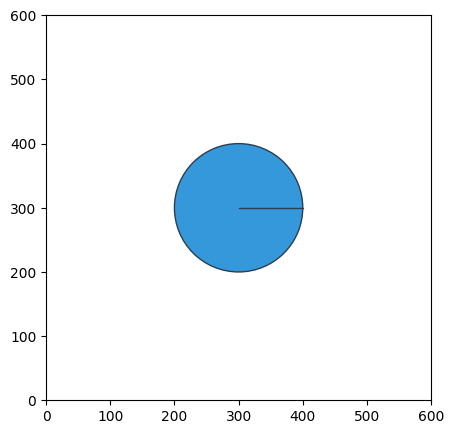

In [18]:
# Create a new figure.
fig = plt.figure(figsize=(5,5))

# Add an axes to the current figure
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))

# Set the aspect ratio of the axes scaling, i.e. y/x-scale.
ax.set_aspect("equal")

# Draw the current state of the space.
space.debug_draw(pymunk.matplotlib_util.DrawOptions(ax))

### **<font style="color:rgb(134,19,348)">Quick Simulation Example</font>**

Now let's create a simple example in order to get your feet wet with this tool. 

In [23]:
# Create a Space which will contain the simulation.
space = pymunk.Space()

# Set the gravity (x and y coordinates values).
# Gravity is the force that will be applied on the bodies inside the space.
space.gravity = 0, 500  

# Create a Body.
body = pymunk.Body()

# Set the position of the body.
body.position = 50, 0   

# Create a circle shape and attach it to the body.
shape = pymunk.Circle(body, radius=10)

# Set the mass of the shape.
# The mass of the body is defined as the quantity of matter that is contained in it.
shape.mass = 1             

# Add both the body and the shape to the simulation.
space.add(body, shape)

  # Check the value of y change as you move the simulation.
for x in range(20):
    space.step(0.02) 
    print(int(body.position[0]), int(body.position[1]))

50 0
50 0
50 0
50 1
50 2
50 3
50 4
50 5
50 7
50 9
50 11
50 13
50 15
50 18
50 21
50 24
50 27
50 30
50 34
50 38


### **<font style="color:rgb(134,19,348)">Simulation with Visualization Example</font>**

Now let's create a simple example in order to get your feet wet with this tool. 

In [29]:
# Create a Space which will contain the simulation.
space = pymunk.Space()

# Set the gravity (x and y coordinates values).
# Gravity is the force that will be applied on the bodies inside the space.
space.gravity = 0, 500  

# Initialize a variable to store the frame counter.
frame_counter = 0

# Iterate until the 'break' statement is executed.
while True:
    
    # Create a black image/canvas.
    image = np.zeros(shape=(500, 500, 3), dtype=np.uint8)
    
    # Check if the frame count is divisible by 10.
    if frame_counter%10 == 0:
        
        # Create a Body.
        body = pymunk.Body()

        # Set the position of the body.
        body.position = np.random.choice(range(0,500)), 0     

        # Create a circle shape and attach it to the body.
        shape = pymunk.Circle(body, radius=10)

        # Set the mass of the shape.
        # The mass of the body is defined as the quantity of matter that is contained in it.
        shape.mass = 1       

        # Add both the body and the shape to the simulation.
        space.add(body, shape)

    # Iterate over the bodies in the space.
    for body in space.bodies:
        
        # Check if the ball's current position y-coordinate is < 500, 
        # which means that ball is still inside the frame.
        if body.position.y < 500:
    
            # Draw a circle on the current position of the body.
            cv2.circle(image, center=(int(body.position[0]), int(body.position[1])), radius=10, 
                       color=(0,255,255), thickness=-1)
            
        # Otherwise.
        else:
            
            # Remove the body from the space.
            space.remove(body, *list(body.shapes))
                                                                                           
    # Display the image.
    cv2.imshow('Simulation', image)
    
    # Increment the frame counter.
    frame_counter+=1
    
    # Step the simulation one step forward.
    space.step(0.02)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed and break the loop.
    if k == 27:
        break

# Close the windows.
cv2.destroyAllWindows()




# Additional comments:
#       - In summary, we use Pymunk to create bodies.
#         And using that body as the core, we stick/add
#         shapes in it (This could be a segment, circle, poly, etc.)
#       - Once a sufficient body has been made, we put it
#         inside a pre-initialized pymunk space where
#         it will simulate physics.
#       - There are things that could affect the simulation,
#         and these are:
#               - space.step : it is how fast the simulation should go.
#                              if you increase this value, it would look
#                              like you are fast forwarding a video.
#               - shape.mass : So this is how heavy the shape/body will be
#                              if you increase this on a specific body/shape,
#                              that shape will be pulled to the ground faster.

As you can see that the simulation is working fine (all the balls are falling downwards as they should be), but you may have noticed that we have applied positive gravitation force on the y-coordinate but in order to move bodies downwards, shouldn't we need negative gravitation force? Let's discuss this in the next lesson.

#### Further Resources:

- **Pymunk + Pygame Tutorial series:** [Link](https://www.youtube.com/playlist?list=PL_N_kL9gRTm8lh7GxFHh3ym1RXi6I6c50)
- **(Alternative)** 20 min video: [Link](https://www.youtube.com/watch?v=YrNpkuVIFdg)


### **<font style="color:rgb(255,140,0)"> Code License Agreement </font>**
```
Copyright (c) 2022 Bleedai.com

Feel free to use this code for your own projects commercial or noncommercial, these projects can be Research-based, just for fun, for-profit, or even Education with the exception that you’re not going to use it for developing a course, book, guide, or any other educational products.

Under *NO CONDITION OR CIRCUMSTANCE* you may use this code for your own paid educational or self-promotional ventures without written consent from Taha Anwar (BleedAI.com).

```
